# Experiment No. 2: Programming assignment for unsupervised learning
- Level 1: Implementation of covariance rule. Implementation of rubner_tavan_network
- Level 2: Implementation of sanger_network.

## Covariance Rule

In [13]:
import numpy as np

# Sample data
X = np.array([2, 4, 6, 8, 10])
Y = np.array([1, 3, 5, 7, 9])

# Compute covariance matrix
cov_matrix = np.cov(X, Y, bias=True)

# Extract covariance value
cov_value = cov_matrix[0, 1]

print("Covariance:", cov_value)


Covariance: 8.0


In [14]:
import pandas as pd

# Creating a dataframe
data = {'X': [2, 4, 6, 8, 10], 'Y': [1, 3, 5, 7, 9]}
df = pd.DataFrame(data)

# Compute covariance
cov_value = df.cov().iloc[0, 1]

print("Covariance:", cov_value)


Covariance: 10.0


## Rubner-Tavan Network Implementation

In [19]:
import numpy as np

class RubnerTavanNetwork:
    def __init__(self, input_dim, num_neurons, learning_rate=0.1, radius=1.0):
        self.input_dim = input_dim
        self.num_neurons = num_neurons
        self.learning_rate = learning_rate
        self.radius = radius  # Controls neighborhood effect
        self.weights = np.random.rand(num_neurons, input_dim)  # Initialize weights

    def find_winner(self, input_vector):
        """Find the closest neuron using Euclidean distance"""
        distances = np.linalg.norm(self.weights - input_vector, axis=1)
        return np.argmin(distances)

    def update_weights(self, winner_idx, input_vector):
        """Hebbian learning rule for updating weights"""
        for i in range(self.num_neurons):
            distance_to_winner = abs(i - winner_idx)
            influence = np.exp(-distance_to_winner**2 / (2 * self.radius**2))
            self.weights[i] += self.learning_rate * influence * (input_vector - self.weights[i])

    def train(self, data, epochs=100):
        """Train the RTN model on input data"""
        for epoch in range(epochs):
            for input_vector in data:
                winner_idx = self.find_winner(input_vector)
                self.update_weights(winner_idx, input_vector)

    def predict(self, input_vector):
        """Find the best-matching neuron for a given input"""
        return self.find_winner(input_vector)

# Example usage
np.random.seed(42)
data = np.random.rand(100, 2)  # 100 samples, 2D input

rtn = RubnerTavanNetwork(input_dim=2, num_neurons=10, learning_rate=0.1)
rtn.train(data, epochs=200)

# Predict winner for a test sample
test_sample = np.array([0.5, 0.5])
winner = rtn.predict(test_sample)
print(f"Best-matching neuron for {test_sample}: {winner}")


Best-matching neuron for [0.5 0.5]: 2


## Sanger Network Implementation

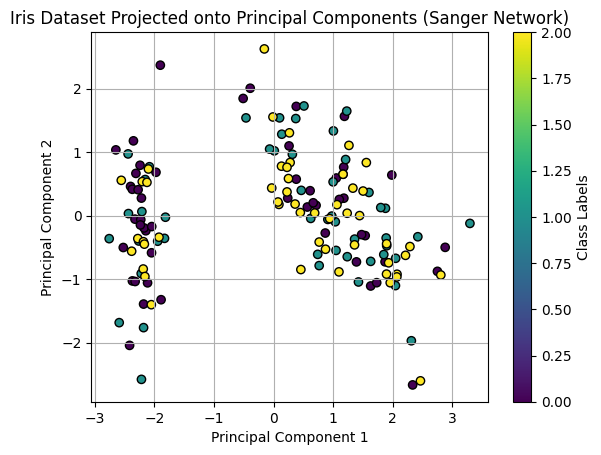

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

class SangerNetwork:
    def __init__(self, input_dim, num_components, learning_rate=0.01):
        """
        Initializes the Sanger Network for Principal Component Analysis.
        :param input_dim: Dimension of input features.
        :param num_components: Number of principal components to extract.
        :param learning_rate: Step size for weight updates.
        """
        self.input_dim = input_dim
        self.num_components = num_components
        self.learning_rate = learning_rate
        self.weights = np.random.rand(num_components, input_dim)  # Random weight initialization

    def train(self, data, epochs=100):
        """Trains the network using the Sanger learning rule."""
        for epoch in range(epochs):
            np.random.shuffle(data)  # Shuffle data for better convergence
            for x in data:
                x = x.reshape(-1, 1)  # Ensure column vector
                y = np.dot(self.weights, x)  # Compute projection onto weight vectors

                for i in range(self.num_components):
                    # Transpose y[:i+1] to align dimensions for matrix multiplication
                    correction = self.learning_rate * (y[i] * (x.T - np.dot(y[:i+1].T, self.weights[:i+1])))
                    self.weights[i] += correction.flatten()  # Update weights

    def transform(self, data):
        """Projects input data onto the learned principal components."""
        return np.dot(self.weights, data.T).T

# Load Iris Dataset
iris = datasets.load_iris()
X = iris.data  # 4D feature space
y = iris.target  # Class labels

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Sanger Network to extract 2 Principal Components
sanger = SangerNetwork(input_dim=4, num_components=2, learning_rate=0.01)

# Train the network
sanger.train(X_scaled, epochs=500)

# Transform data (reduce dimensions to 2D)
transformed_data = sanger.transform(X_scaled)

# Visualize the Transformed Data
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title("Iris Dataset Projected onto Principal Components (Sanger Network)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Class Labels")
plt.grid()
plt.show()